<a href="https://colab.research.google.com/github/SarankanT/MSCI-436-Final-Project/blob/main/MSCI_436_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Executive Summary

Our end user is a landscaping company seeking to launch an advertising campaign in a specific neighborhood in Ames, Iowa.

Our objective for this campaign is to analyze various characteristics of houses in that neighborhood in order to anticipate the impact or potential increase in their value.

We will examine the correlations between specific house characteristics and their corresponding prices. This analysis will help us determine whether services offered by our landscaping company, such as adding a pool or fence, have the potential to enhance the value of a house.

# 2. Install & Import Packages

## 2.1 Install Streamlit and localtunnel

In [2]:
!pip install -q streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 123.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.4 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2

## 2.2 Import packages

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 3. Load Data

In [51]:
train_data = pd.read_csv("train.csv")
train_data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [52]:
test_data = pd.read_csv("test.csv")
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# 4. Clean & Manipulate Data

For the advertising campaign the key features we will be investigating are:

*   Roof style
*   Exterior Quality
*   Rating of basement finished area
*   Heating quality and condition
*   Kitchen quality
*   Fireplace quality
*   Garage Quality
*   Fence quality
*   Year sold
*   Sale Price

## 4.1 Clean Train Data

write a sentence about why we are cleaning the data this way

In [53]:
# Clean Train Data
train_data = train_data.select_dtypes(include = ['float64', 'int64', 'bool_', 'object']).fillna('0')

# Remove columns that we don't need
train_data.drop(columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street' , 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                           'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
                           'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageArea',  'PavedDrive',
                           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Neighborhood', 'ExterCond', 'GarageCond', 'PoolArea', 'PoolQC'],
                 axis = 1, inplace = True)

train_data.columns

Index(['Id', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'Fence',
       'YrSold', 'SalePrice'],
      dtype='object')

In [54]:
# New train table
train_data.tail()

,Id,YearRemodAdd,RoofStyle,ExterQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageQual,Fence,YrSold,SalePrice
1455,1456,2000,Gable,TA,Unf,Ex,TA,TA,TA,0,2007,175000
1456,1457,1988,Gable,TA,ALQ,TA,TA,TA,TA,MnPrv,2010,210000
1457,1458,2006,Gable,Ex,GLQ,Ex,Gd,Gd,TA,GdPrv,2010,266500
1458,1459,1996,Hip,TA,GLQ,Gd,Gd,0,TA,0,2010,142125
1459,1460,1965,Gable,Gd,BLQ,Gd,TA,0,TA,0,2008,147500


## 4.2 Clean Test Data

write a sentence about why we are cleaning the data this way

In [55]:
# Clean Test Data
test_data = test_data.select_dtypes(include = ['float64', 'int64', 'bool_', 'object']).fillna(0)

# Remove columns that we don't need
test_data.drop(columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street' , 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                           'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
                           'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageArea',  'PavedDrive',
                           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Neighborhood', 'ExterCond', 'GarageCond', 'PoolArea', 'PoolQC'],
                 axis = 1, inplace = True)

test_data.columns

Index(['Id', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'Fence',
       'YrSold'],
      dtype='object')

In [56]:
# New test table
test_data.tail()

,Id,YearRemodAdd,RoofStyle,ExterQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageQual,Fence,YrSold
1454,2915,1970,Gable,TA,Unf,Gd,TA,0,0,0,2006
1455,2916,1970,Gable,TA,Rec,TA,TA,0,TA,0,2006
1456,2917,1996,Gable,TA,ALQ,Ex,TA,TA,TA,0,2006
1457,2918,1992,Gable,TA,GLQ,TA,TA,0,0,MnPrv,2006
1458,2919,1994,Gable,TA,LwQ,Ex,TA,TA,TA,0,2006


## 4.3 Manipulating the Dataframe

First we will utilize the "Year Sold" feature to accommodate inflation adjustments for 2023.

<Axes: title={'center': 'Year Sold vs. Sale Price'}, xlabel='YrSold', ylabel='SalePrice'>

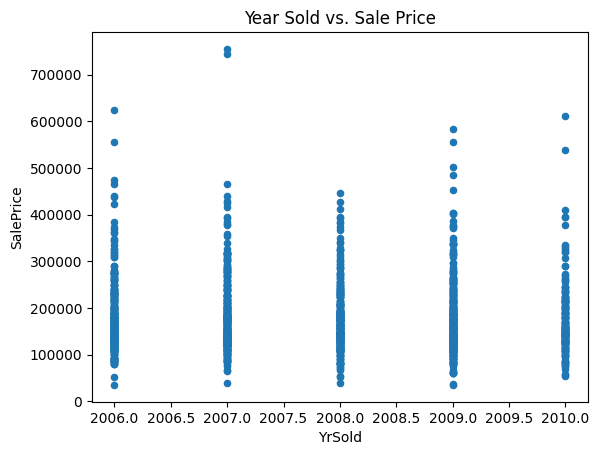

In [57]:
# Plot of Year Sold Vs. Sale Price
train_data.plot.scatter(x = 'YrSold', y = 'SalePrice', title = "Year Sold vs. Sale Price")

We observe that houses were exclusively sold between 2006 and 2010. We can incorporate an inflation adjustments specific to these years when considering prices for 2023.

From our [research](https://www.in2013dollars.com/us/inflation/2006?amount=1):

*   \$1 in 2006 is worth \$1.51 in 2023

*   \$1 in 2007 is worth \$1.47 in 2023

*   \$1 in 2008 is worth \$1.41 in 2023

*   \$1 in 2009 is worth \$1.42 in 2023

*   \$1 in 2010 is worth \$1.39 in 2023

In [58]:
# Adjust the sale price based on inflation
infl_2006 = 1.51
infl_2007 = 1.47
infl_2008 = 1.41
infl_2009 = 1.42
infl_2010 = 1.39

# Define a scalar for each category & rewrite Sale Price to account for inflation
scalars = {2006: infl_2006, 2007: infl_2007, 2008: infl_2008, 2009: infl_2009, 2010: infl_2010}
train_data['SalePrice'] = train_data.apply(lambda row: row['SalePrice'] * scalars[row['YrSold']], axis=1)

train_data.tail(10)

,Id,YearRemodAdd,RoofStyle,ExterQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageQual,Fence,YrSold,SalePrice
1450,1451,1974,Gable,TA,Unf,TA,TA,0,0,0,2009,193120.00
1451,1452,2009,Gable,Gd,Unf,Ex,Ex,Gd,TA,0,2009,407667.80
1452,1453,2005,Gable,TA,GLQ,Gd,TA,0,TA,0,2006,218950.00
1453,1454,2006,Gable,TA,Unf,Ex,TA,0,0,0,2006,127595.00
1454,1455,2005,Gable,Gd,GLQ,Ex,Gd,0,TA,0,2009,262700.00
1455,1456,2000,Gable,TA,Unf,Ex,TA,TA,TA,0,2007,257250.00
1456,1457,1988,Gable,TA,ALQ,TA,TA,TA,TA,MnPrv,2010,291900.00
1457,1458,2006,Gable,Ex,GLQ,Ex,Gd,Gd,TA,GdPrv,2010,370435.00
1458,1459,1996,Hip,TA,GLQ,Gd,Gd,0,TA,0,2010,197553.75
1459,1460,1965,Gable,Gd,BLQ,Gd,TA,0,TA,0,2008,207975.00


In [69]:
# Rename columns
train_data.columns = ['Id', 'YearRemodelled', 'RoofStyle', 'ExteriorQuality', 'BasementFinish', 'HeatingQuality', 'KitchenQuality', 'FireplaceQuality', 'GarageQuality', 'FenceQuality', 'YearSold', 'SalePrice']
test_data.columns = ['Id', 'YearRemodelled', 'RoofStyle', 'ExteriorQuality', 'BasementFinish', 'HeatingQuality', 'KitchenQuality', 'FireplaceQuality', 'GarageQuality', 'FenceQuality', 'YearSold']

In [60]:
# Check for nulls
print(train_data.isnull().sum())

Id                  0
YearRemodelled      0
RoofStyle           0
ExteriorQuality     0
BasementFinish      0
HeatingQuality      0
KitchenQuality      0
FireplaceQuality    0
GarageQuality       0
FenceQuality        0
YearSold            0
SalePrice           0
dtype: int64


# 5. Plotting the correlations of Features vs. Sale Price


## 5.1 Plotting the correlations

To obtain a general overview of the data, we plotted the correlations between the features and the Sale Price.

<Axes: title={'center': 'Fence Quality vs. Sale Price'}, xlabel='FenceQuality', ylabel='SalePrice'>

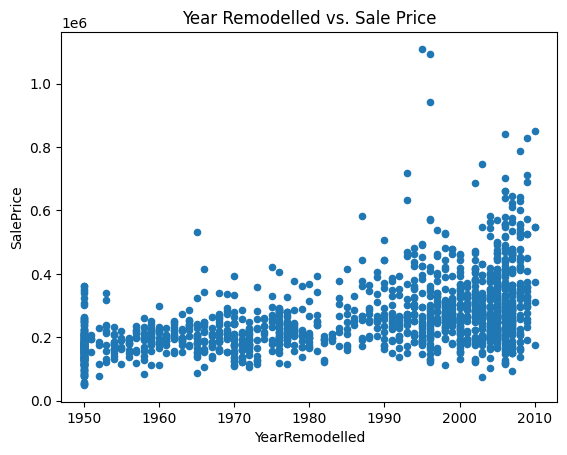

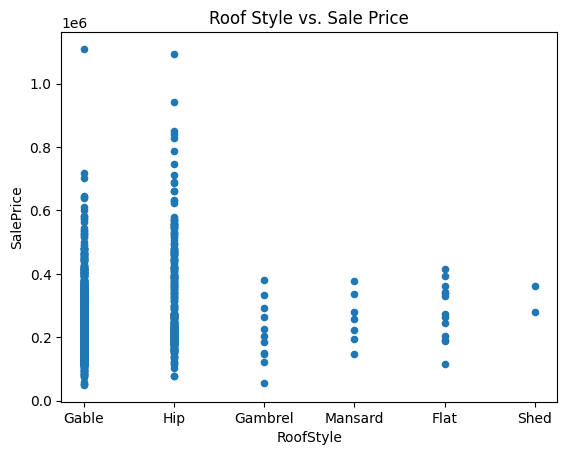

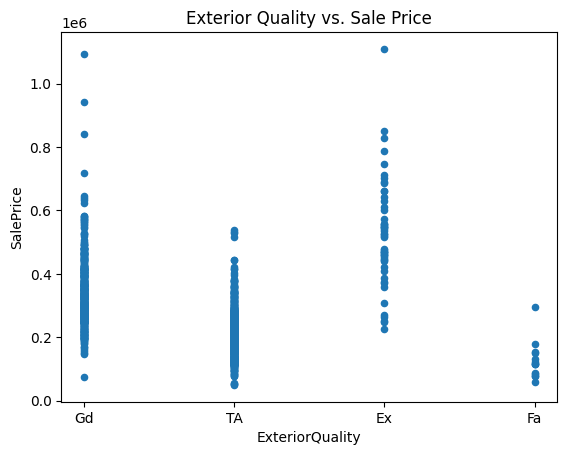

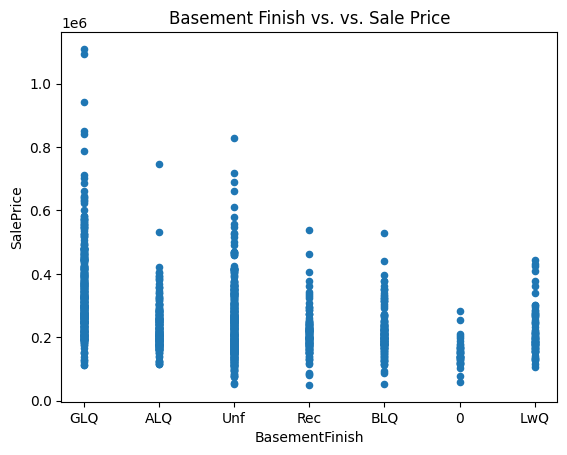

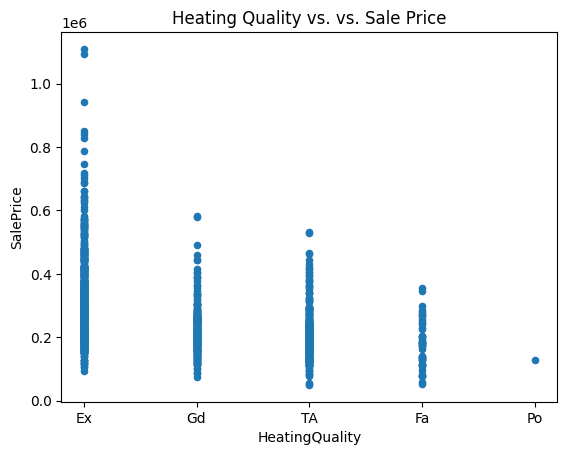

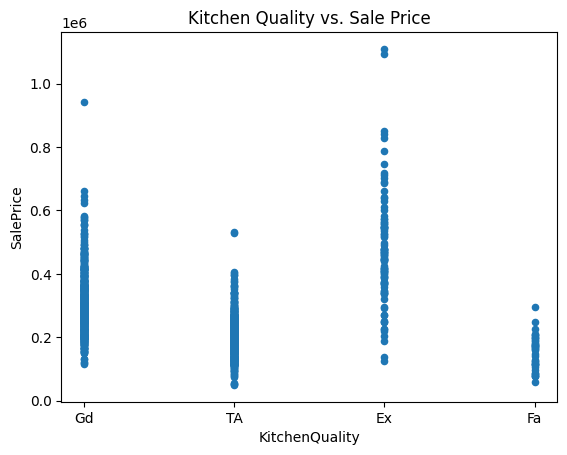

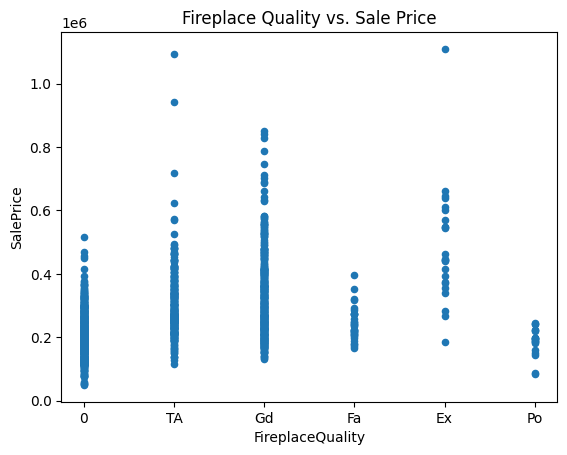

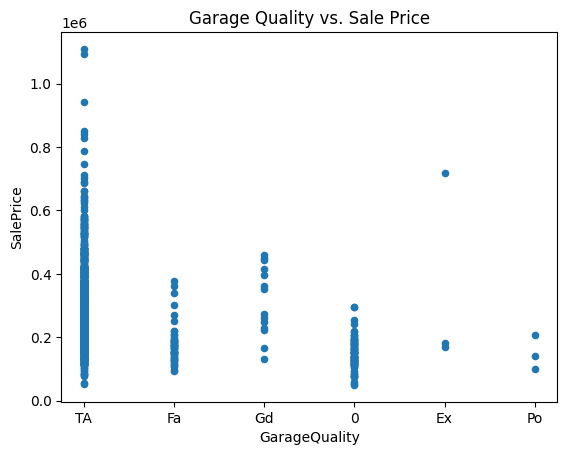

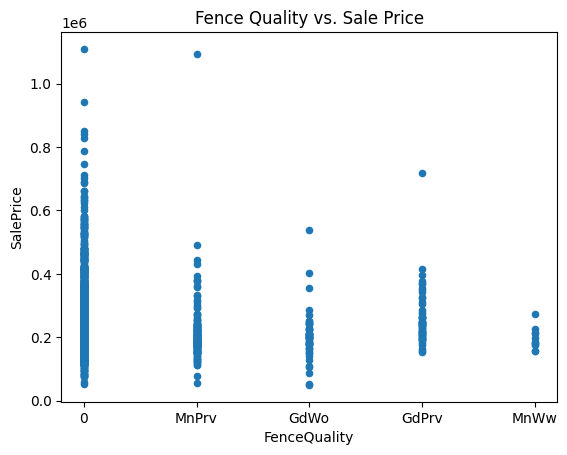

In [61]:
# Plotting the correlations
train_data.plot.scatter(x = 'YearRemodelled', y = 'SalePrice', title = 'Year Remodelled vs. Sale Price')
train_data.plot.scatter(x = 'RoofStyle', y = 'SalePrice', title = 'Roof Style vs. Sale Price')
train_data.plot.scatter(x = 'ExteriorQuality', y = 'SalePrice', title = 'Exterior Quality vs. Sale Price')
train_data.plot.scatter(x = 'BasementFinish', y = 'SalePrice', title = 'Basement Finish vs. vs. Sale Price')
train_data.plot.scatter(x = 'HeatingQuality', y = 'SalePrice', title = 'Heating Quality vs. vs. Sale Price')
train_data.plot.scatter(x = 'KitchenQuality', y = 'SalePrice', title = 'Kitchen Quality vs. Sale Price')
train_data.plot.scatter(x = 'FireplaceQuality', y = 'SalePrice', title = 'Fireplace Quality vs. Sale Price')
train_data.plot.scatter(x = 'GarageQuality', y = 'SalePrice', title = 'Garage Quality vs. Sale Price')
train_data.plot.scatter(x = 'FenceQuality', y = 'SalePrice', title = 'Fence Quality vs. Sale Price')

## 5.2 Change datatypes from an object to an integer

In [62]:
# Year Remodelled is already in a integer datatype
# Roof Style
train_data['RoofStyle'].replace(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], [1,2,3,4,5,6], inplace = True)
# Exterior Quality
train_data['ExteriorQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Basement Quality
train_data['BasementFinish'].replace(['0', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0,7,6,5,4,3,2,1], inplace = True)
# Heating Quality
train_data['HeatingQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Kitchen Quality
train_data['KitchenQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Fireplace Quality
train_data['FireplaceQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Garage Quality
train_data['GarageQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Fence Quality
train_data['FenceQuality'].replace(['0', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], [0,1,2,3,4], inplace = True)

In [63]:
# Check train_data datatypes
print(train_data.dtypes)

Id                    int64
YearRemodelled        int64
RoofStyle             int64
ExteriorQuality       int64
BasementFinish        int64
HeatingQuality        int64
KitchenQuality        int64
FireplaceQuality      int64
GarageQuality         int64
FenceQuality          int64
YearSold              int64
SalePrice           float64
dtype: object


# 6. Split Data

We acknowledge that the test_data does not contain the Sale Price feature. Therefore, we will divide the data using a 70/30 split, enabling us to perform error testing and evaluate the model's accuracy.

In [64]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:, 0]

# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 7. Linear Regression Model

In [65]:
# Linear Regression Model
regression = LinearRegression().fit(X_train, y_train)
y_pred = regression.predict(X_test)
coef = regression.coef_
intercept = regression.intercept_

print('Linear regression coefficients : ')
i = 0;
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1
print('')

print(f'Linear regression y-intercept = {intercept}')
print('')

Linear regression coefficients : 
YearRemodelled : -1.0858180033828753
RoofStyle : 8.925423522983744
ExteriorQuality : 32.48144696782787
BasementFinish : 0.1570451208096929
HeatingQuality : -5.015837304642428
KitchenQuality : 30.518926534541546
FireplaceQuality : 4.588692348766096
GarageQuality : 4.6415171880841335
FenceQuality : -1.7534030151463933
YearSold : 2.7739124081714714
SalePrice : -0.00023271761127574564

Linear regression y-intercept = -2844.1121595417944



# 8. Error Testing the Regression Model

In [66]:
#Calculate the MSE and R^2 values
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear regression MSE = ', mse_test, '\n')
print('Linear regression R2 = ', r2, '\n')

Linear regression MSE =  177668.79769746313 

Linear regression R2 =  -0.007101623405427748 



Not a good R^2 value sentence

# 9. Create a streamlit app example

## 9.1 Writing the streamlit file

In [195]:
%%writefile app.py
# Cheatsheet available at https://docs.streamlit.io/library/cheatsheet

import streamlit as st
import pandas as pd

st.set_page_config(layout="wide")

st.title('Welcome to Kings Landscaping Solutions!')
st.write("By Team 11: Stuart Barber, Anika Gapczynski, Ismael Naous, Sarankan Thirunavukkarasu")

st.write("With our extensive experience and dedication to excellence, we specialize in transforming houses into dream homes worthy of a KING!")
st.write("Whether you need a kitchen remodel, bathroom upgrade, complete home renovation, or stylish additions, our skilled team of professionals is committed to bringing your vision to life. We provide personalized design solutions, transparent communication, and exceptional customer service to ensure a seamless renovation process. Let us turn your house into the home of your dreams - contact us today to schedule a consultation and experience the highest quality home renovations in Ames, Iowa.")


# Images of past remodelling work
st.header('Our Past Work')
col1, col2, col3 = st.columns(3)
with col1:
    st.image('./realestate2.jpeg', caption='Recently remodelled home in Ames, Iowa', use_column_width = "auto")

with col2:
    st.image('./realestate1.jpeg', caption='Recently remodelled home in Ames, Iowa', use_column_width = "auto")

with col3:
    st.image('./realestate3.jpeg', caption='Recently remodelled home in Ames, Iowa', use_column_width = "auto")


# Linear Regression Model
st.columns(1)
st.header('Kings Landscaping Enhances the Value of Your Homes')
st.write("Skeptical? Put the value-boosting effect of home renovations to the test!")

st.subheader('Basic graphs about data')
st.write("Data + words")

st.subheader('Actual Machine Learning Model')
st.write("Data + words")

st.subheader('Another subheading block if needed')
st.write("Data + words")

data = pd.read_csv('train.csv')


# Customer Reviews
st.header('Reviews & Testimonials')
st.columns(1)
st.write("These customer reviews highlight the exceptional craftsmanship, professionalism, and customer satisfaction provided by Kings Landscaping.")

col1, col2, col3, col4 = st.columns(4)
with col1:
    st.write("*I couldn't be happier with the incredible transformation of my kitchen! Kings Landscaping took my ideas and turned them into a reality. The attention to detail and craftsmanship were outstanding.*")
    st.write("*- Jeeva L.*")
with col2:
    st.write("*From start to finish, Kings Landscaping exceeded my expectations. Their team was professional, friendly, and incredibly skilled.*")
    st.write("*- Tami & Craig R.*")

with col3:
    st.write("*I am thoroughly impressed with the quality of work provided by Kings Landscaping. They listened attentively to my requirements and delivered a beautifully landscaped fireplace. The communication throughout the project was excellent, and the team was always prompt and respectful.*")
    st.write("*- Juan M.*")

with col4:
    st.write("*Working with Kings Landscaping was a fantastic experience. The team's creativity, attention to detail, and commitment to customer satisfaction was outstanding. I am thrilled with the results and would absolutely recommend Kings Landscaping to anyone in need of top-quality renovation services.*")
    st.write("*- David & Catrina G.*")


# Contact Us section
st.header('Contact Us')
st.write("For more information or to get started on your home renovation project, please don't hesitate to contact us at (515)-112-2341 or kings.landscaping@gmail.com.")

Overwriting app.py


## 9.2 Run the app and keep logs

In [196]:
!streamlit run /content/app.py &>/content/logs.txt &

In [197]:
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

35.221.63.146
npx: installed 22 in 1.615s
your url is: https://stale-kings-roll.loca.lt
^C
